## Cenário

No momento da adesao de um seguro, tenho cerca de 20 variáveis (categoricas e numericas) para mapear o perfil dos clientes na entrada por período.

## ETL

In [1]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression



In [2]:
# Volumetria por mês
meses = ['202401', '202402', '202403', '202404', '202405', '202406', '202407', 
         '202408', '202409', '202410', '202411', '202412']
volumes = [31910, 33472, 31777, 19771, 24249, 26134, 18438, 32058, 29322, 28121, 21647, 29358]

# Estados do Brasil
estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 
           'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 
           'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

# Inicializar lista para dados
dados = []
id_adesao = 1

for mes, n in zip(meses, volumes):
    for _ in range(n):
        canal = np.random.choice(['LOJA', 'INTERNET'])
        codigo_loja = np.random.choice(['L1', 'L2', 'L3', 'L4', 'L5']) if canal == 'LOJA' else np.nan
        tipo_venda = np.random.choice(['POS', 'PRE'])
        produto = np.random.choice(['PERDA', 'LAR', 'SAUDE', 'FATURA'])
        prestamista = 1 if produto == 'FATURA' else 0
        valor = 0 if prestamista == 1 else {'PERDA': 5, 'LAR': 10, 'SAUDE': 20}[produto]
        estado = np.random.choice(estados)
        
        linha = {
            'ID_ADESAO': id_adesao,
            'SAFRA_ADESAO': mes,
            'CANAL_VENDA': canal,
            'CODIGO_LOJA': codigo_loja,
            'TIPO_VENDA': tipo_venda,
            'PRODUTO': produto,
            'PRESTAMISTA': prestamista,
            'ESTADO': estado,
            'VALOR': valor
        }
        dados.append(linha)
        id_adesao += 1

# Criar DataFrame final
df = pd.DataFrame(dados)
df.head()

,ID_ADESAO,SAFRA_ADESAO,CANAL_VENDA,CODIGO_LOJA,TIPO_VENDA,PRODUTO,PRESTAMISTA,ESTADO,VALOR
0,1,202401,LOJA,L2,POS,FATURA,1,CE,0
1,2,202401,LOJA,L5,PRE,FATURA,1,AC,0
2,3,202401,INTERNET,NaN,PRE,FATURA,1,RS,0
3,4,202401,LOJA,L1,PRE,FATURA,1,DF,0
4,5,202401,INTERNET,NaN,PRE,PERDA,0,PA,5


## Analises Iniciais

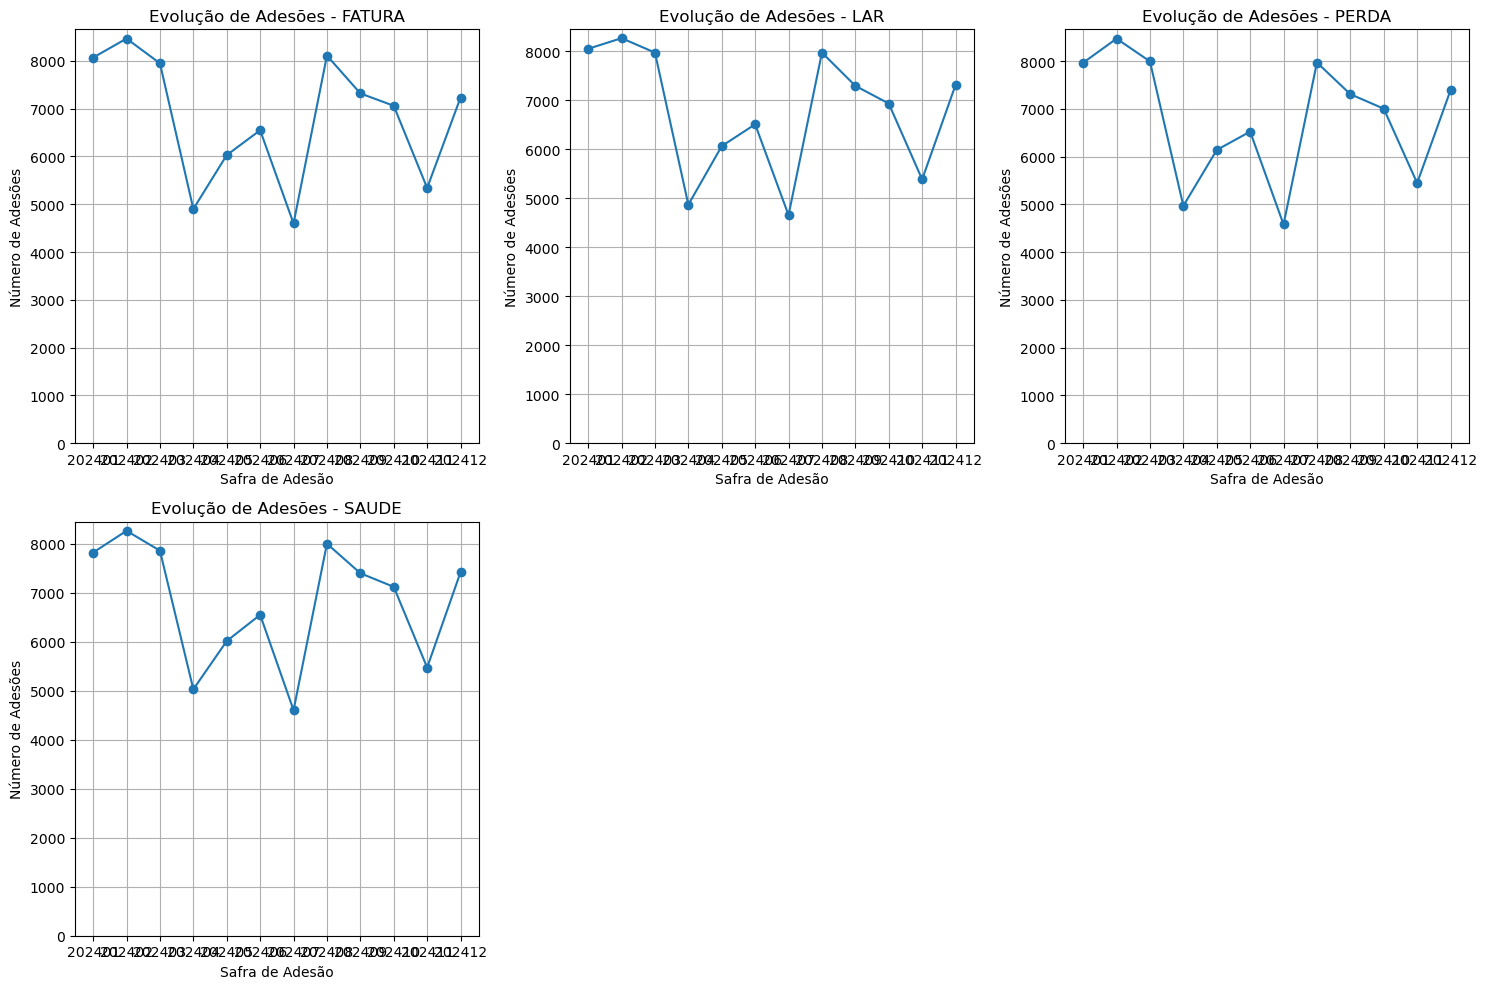

In [4]:
# Contagem de adesões por safra e produto
contagem_produto = df.groupby(['SAFRA_ADESAO', 'PRODUTO'])['ID_ADESAO'].count().unstack('PRODUTO').fillna(0)

# Configurar matriz de subplots: 3 colunas, n linhas
n_produtos = contagem_produto.shape[1]
n_cols = 3
n_rows = math.ceil(n_produtos / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()  # transformar em lista simples para iteração

# Plotar cada produto
for i, produto in enumerate(contagem_produto.columns):
    axs[i].plot(contagem_produto.index, contagem_produto[produto], marker='o')
    axs[i].set_title(f'Evolução de Adesões - {produto}')
    axs[i].set_xlabel('Safra de Adesão')
    axs[i].set_ylabel('Número de Adesões')
    axs[i].set_ylim(bottom=0)  # garantir Y começando em 0
    axs[i].grid(True)

# Apagar gráficos extras se sobrarem espaços vazios
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



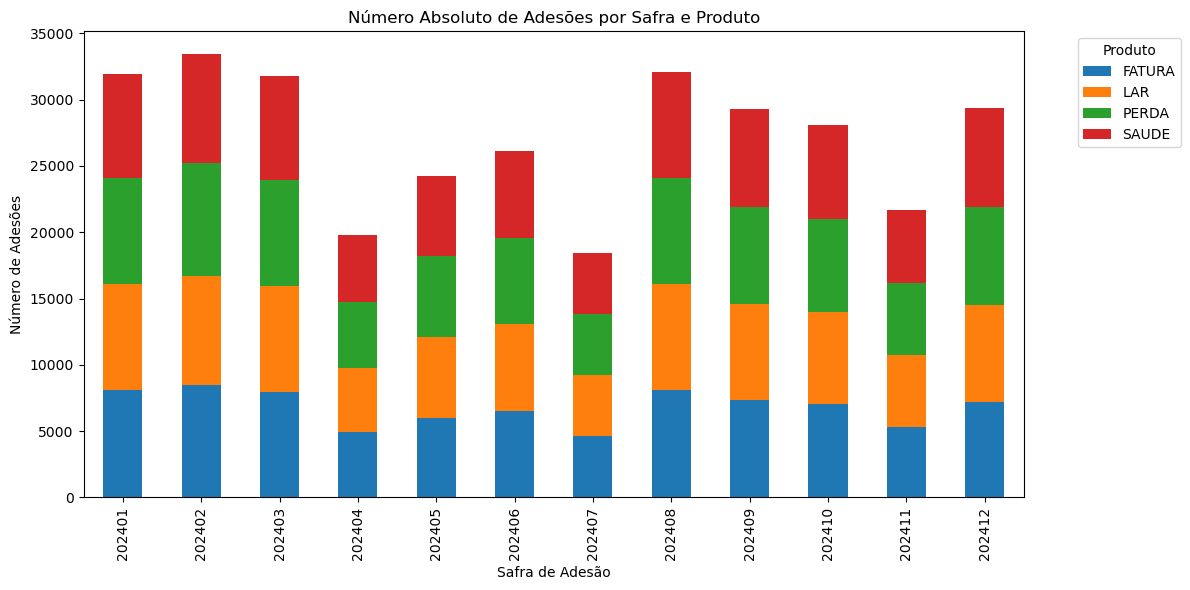

In [7]:
# Contagem de adesões por safra e produto
contagem_produto = df.groupby(['SAFRA_ADESAO', 'PRODUTO'])['ID_ADESAO'].count().unstack('PRODUTO').fillna(0)

# Plotar gráfico de barras empilhadas absolutas
contagem_produto.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Número Absoluto de Adesões por Safra e Produto')
plt.xlabel('Safra de Adesão')
plt.ylabel('Número de Adesões')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


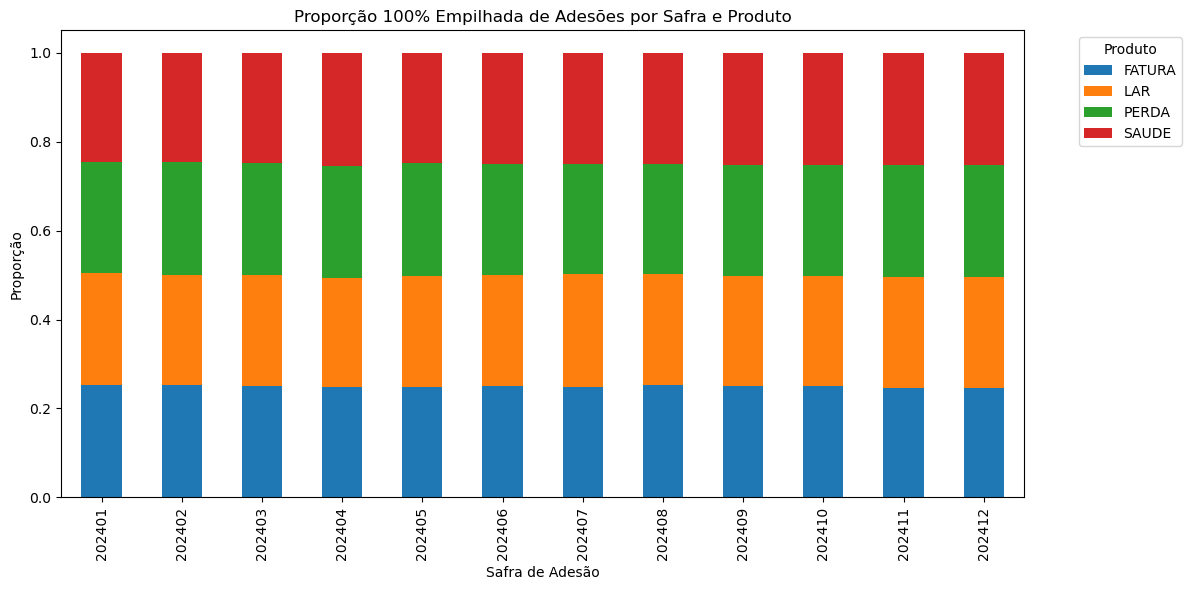

In [6]:
import matplotlib.pyplot as plt

# Contagem de adesões por safra e produto
contagem_produto = df.groupby(['SAFRA_ADESAO', 'PRODUTO'])['ID_ADESAO'].count().unstack('PRODUTO').fillna(0)

# Calcular proporção 100%
proporcao_produto = contagem_produto.div(contagem_produto.sum(axis=1), axis=0)

# Plotar gráfico de barras 100% empilhadas
proporcao_produto.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Proporção 100% Empilhada de Adesões por Safra e Produto')
plt.xlabel('Safra de Adesão')
plt.ylabel('Proporção')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Abertura por variáveis

In [8]:
# Resumo geral do DataFrame
print("📊 Resumo geral do DataFrame:\n")
print(df.info())

print("\n✅ Descrição numérica:\n")
print(df.describe())

print("\n✅ Descrição categórica (valores únicos, mais frequentes):\n")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n🔹 Variável: {col}")
    print(f"- Valores únicos: {df[col].nunique()}")
    print(f"- Mais frequente:\n{df[col].value_counts().head()}")


📊 Resumo geral do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326257 entries, 0 to 326256
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID_ADESAO     326257 non-null  int64 
 1   SAFRA_ADESAO  326257 non-null  object
 2   CANAL_VENDA   326257 non-null  object
 3   CODIGO_LOJA   163348 non-null  object
 4   TIPO_VENDA    326257 non-null  object
 5   PRODUTO       326257 non-null  object
 6   PRESTAMISTA   326257 non-null  int64 
 7   ESTADO        326257 non-null  object
 8   VALOR         326257 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.4+ MB
None

✅ Descrição numérica:

           ID_ADESAO    PRESTAMISTA          VALOR
count  326257.000000  326257.000000  326257.000000
mean   163129.000000       0.250168       8.744824
std     94182.427725       0.433110       7.396419
min         1.000000       0.000000       0.000000
25%     81565.000000       0.000000       0.000000
5

## Abertura por variáveis

In [13]:
# Identificar variáveis categóricas e numéricas
variaveis_categ = df.select_dtypes(include=['object', 'category']).columns.tolist()
variaveis_num = df.select_dtypes(include=['number']).columns.tolist()

# Remover SAFRA_ADESAO (se existir nas listas)
if 'SAFRA_ADESAO' in variaveis_categ:
    variaveis_categ.remove('SAFRA_ADESAO')

if 'SAFRA_ADESAO' in variaveis_num:
    variaveis_num.remove('SAFRA_ADESAO')

print("✅ Variáveis categóricas:")
print(variaveis_categ)

print("\n✅ Variáveis numéricas:")
print(variaveis_num)



✅ Variáveis categóricas:
['CANAL_VENDA', 'CODIGO_LOJA', 'TIPO_VENDA', 'PRODUTO', 'ESTADO']

✅ Variáveis numéricas:
['ID_ADESAO', 'PRESTAMISTA', 'VALOR']


In [17]:
# Inicializar dicionário
variacao_categ = {}

# Calcular variação mês a mês para cada variável categórica limpa
for var in variaveis_categ:
    distrib = df.groupby(['SAFRA_ADESAO', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack().fillna(0)  # garantir valores sem NaN
    delta = pivot.diff().abs().sum().sum()
    variacao_categ[var] = delta

# Mostrar resultado final
print("📊 Variação total por variável categórica:")
for var, valor in variacao_categ.items():
    print(f"- {var}: {valor:.4f}")


📊 Variação total por variável categórica:
- CANAL_VENDA: 0.0796
- CODIGO_LOJA: 0.1857
- TIPO_VENDA: 0.0861
- PRODUTO: 0.0915
- ESTADO: 0.3807


In [19]:
# Transformar dicionário em DataFrame para análise
df_variacao = pd.DataFrame.from_dict(variacao_categ, orient='index', columns=['Variacao_Total'])
df_variacao = df_variacao.sort_values('Variacao_Total', ascending=False)

# Identificar variável com maior e menor variação
maior_var = df_variacao['Variacao_Total'].idxmax()
menor_var = df_variacao['Variacao_Total'].idxmin()

# Gerar resumo explicativo automático
print(f"📈 A variável categórica com MAIOR variação foi '{maior_var}', indicando mudanças expressivas mês a mês na distribuição das categorias.")
print(f"📉 A variável com MENOR variação foi '{menor_var}', indicando estabilidade ao longo dos meses.")
print("Essas métricas ajudam a área de negócios a identificar onde houve mais movimentação nos perfis e priorizar análises ou ações específicas.")

📈 A variável categórica com MAIOR variação foi 'ESTADO', indicando mudanças expressivas mês a mês na distribuição das categorias.
📉 A variável com MENOR variação foi 'CANAL_VENDA', indicando estabilidade ao longo dos meses.
Essas métricas ajudam a área de negócios a identificar onde houve mais movimentação nos perfis e priorizar análises ou ações específicas.


In [20]:
# Preparar dicionário de DataFrames para armazenar diferenças e percentuais
resultados_mensais = {}

for var in variaveis_categ:
    # Contagem absoluta de IDs por safra + categoria
    contagem = df.groupby(['SAFRA_ADESAO', var])['ID_ADESAO'].count().unstack(var).fillna(0)
    # Diferença absoluta mês a mês
    delta_abs = contagem.diff()
    # Percentual de variação mês a mês (evitar divisão por zero)
    delta_pct = delta_abs.divide(contagem.shift(1)).replace([np.inf, -np.inf], np.nan) * 100

    # Juntar em um único DataFrame
    df_resultado = pd.concat([delta_abs.add_suffix('_abs'), delta_pct.add_suffix('_pct')], axis=1)
    resultados_mensais[var] = df_resultado

    # Mostrar resumo no console
    print(f"\n📊 Diferença absoluta e percentual mês a mês para {var}:")
    print(df_resultado)




📊 Diferença absoluta e percentual mês a mês para CANAL_VENDA:
CANAL_VENDA   INTERNET_abs  LOJA_abs  INTERNET_pct   LOJA_pct
SAFRA_ADESAO                                                 
202401                 NaN       NaN           NaN        NaN
202402               588.0     974.0      3.670641   6.129256
202403              -749.0    -946.0     -4.510146  -5.609250
202404             -6021.0   -5985.0    -37.968218 -37.596583
202405              2222.0    2256.0     22.588187  22.709885
202406               782.0    1103.0      6.484783   9.048400
202407             -3574.0   -4122.0    -27.832723 -31.008802
202408              6792.0    6828.0     73.292328  74.452077
202409             -1325.0   -1411.0     -8.250825  -8.819301
202410              -664.0    -537.0     -4.506583  -3.681108
202411             -3282.0   -3192.0    -23.326226 -22.717244
202412              3982.0    3729.0     36.911383  34.340179

📊 Diferença absoluta e percentual mês a mês para CODIGO_LOJA:
CODIGO

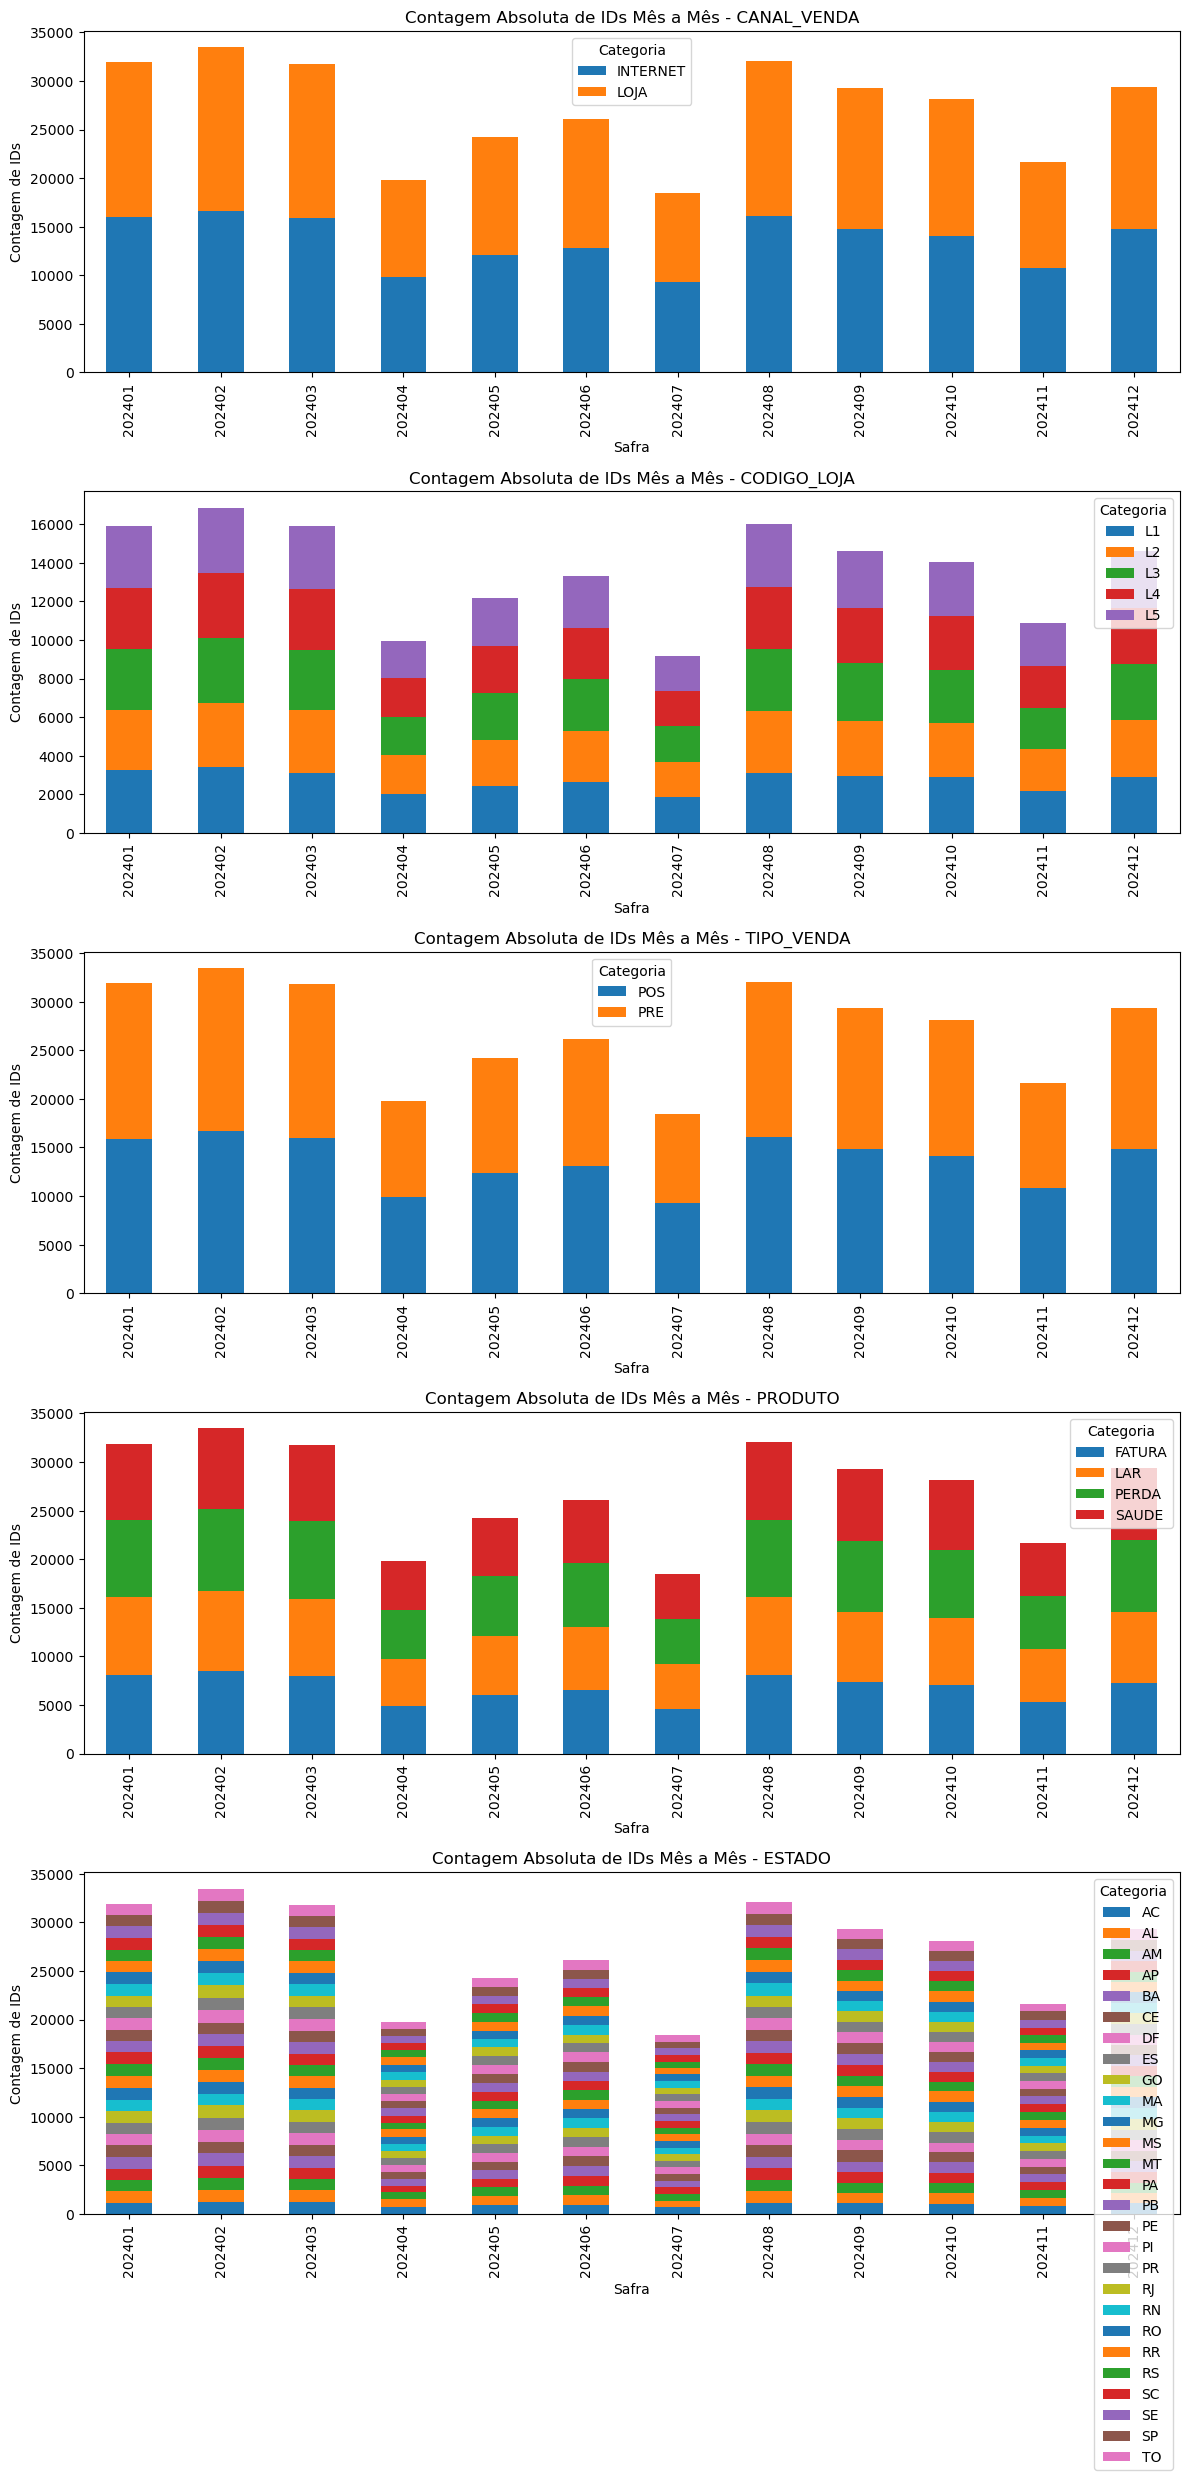

In [22]:
# Filtrar variáveis categóricas, exceto SAFRA_ADESAO
variaveis_categ_filtradas = [v for v in variaveis_categ if v != 'SAFRA_ADESAO']

# Preparar subplots para gráficos empilhados
fig, axs = plt.subplots(len(variaveis_categ_filtradas), 1, figsize=(12, 5 * len(variaveis_categ_filtradas)))

if len(variaveis_categ_filtradas) == 1:
    axs = [axs]  # garantir iterabilidade

for i, var in enumerate(variaveis_categ_filtradas):
    contagem = df.groupby(['SAFRA_ADESAO', var])['ID_ADESAO'].count().unstack(var).fillna(0)
    contagem.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(f'Contagem Absoluta de IDs Mês a Mês - {var}')
    axs[i].set_xlabel('Safra')
    axs[i].set_ylabel('Contagem de IDs')
    axs[i].legend(title='Categoria')

plt.tight_layout()
plt.show()


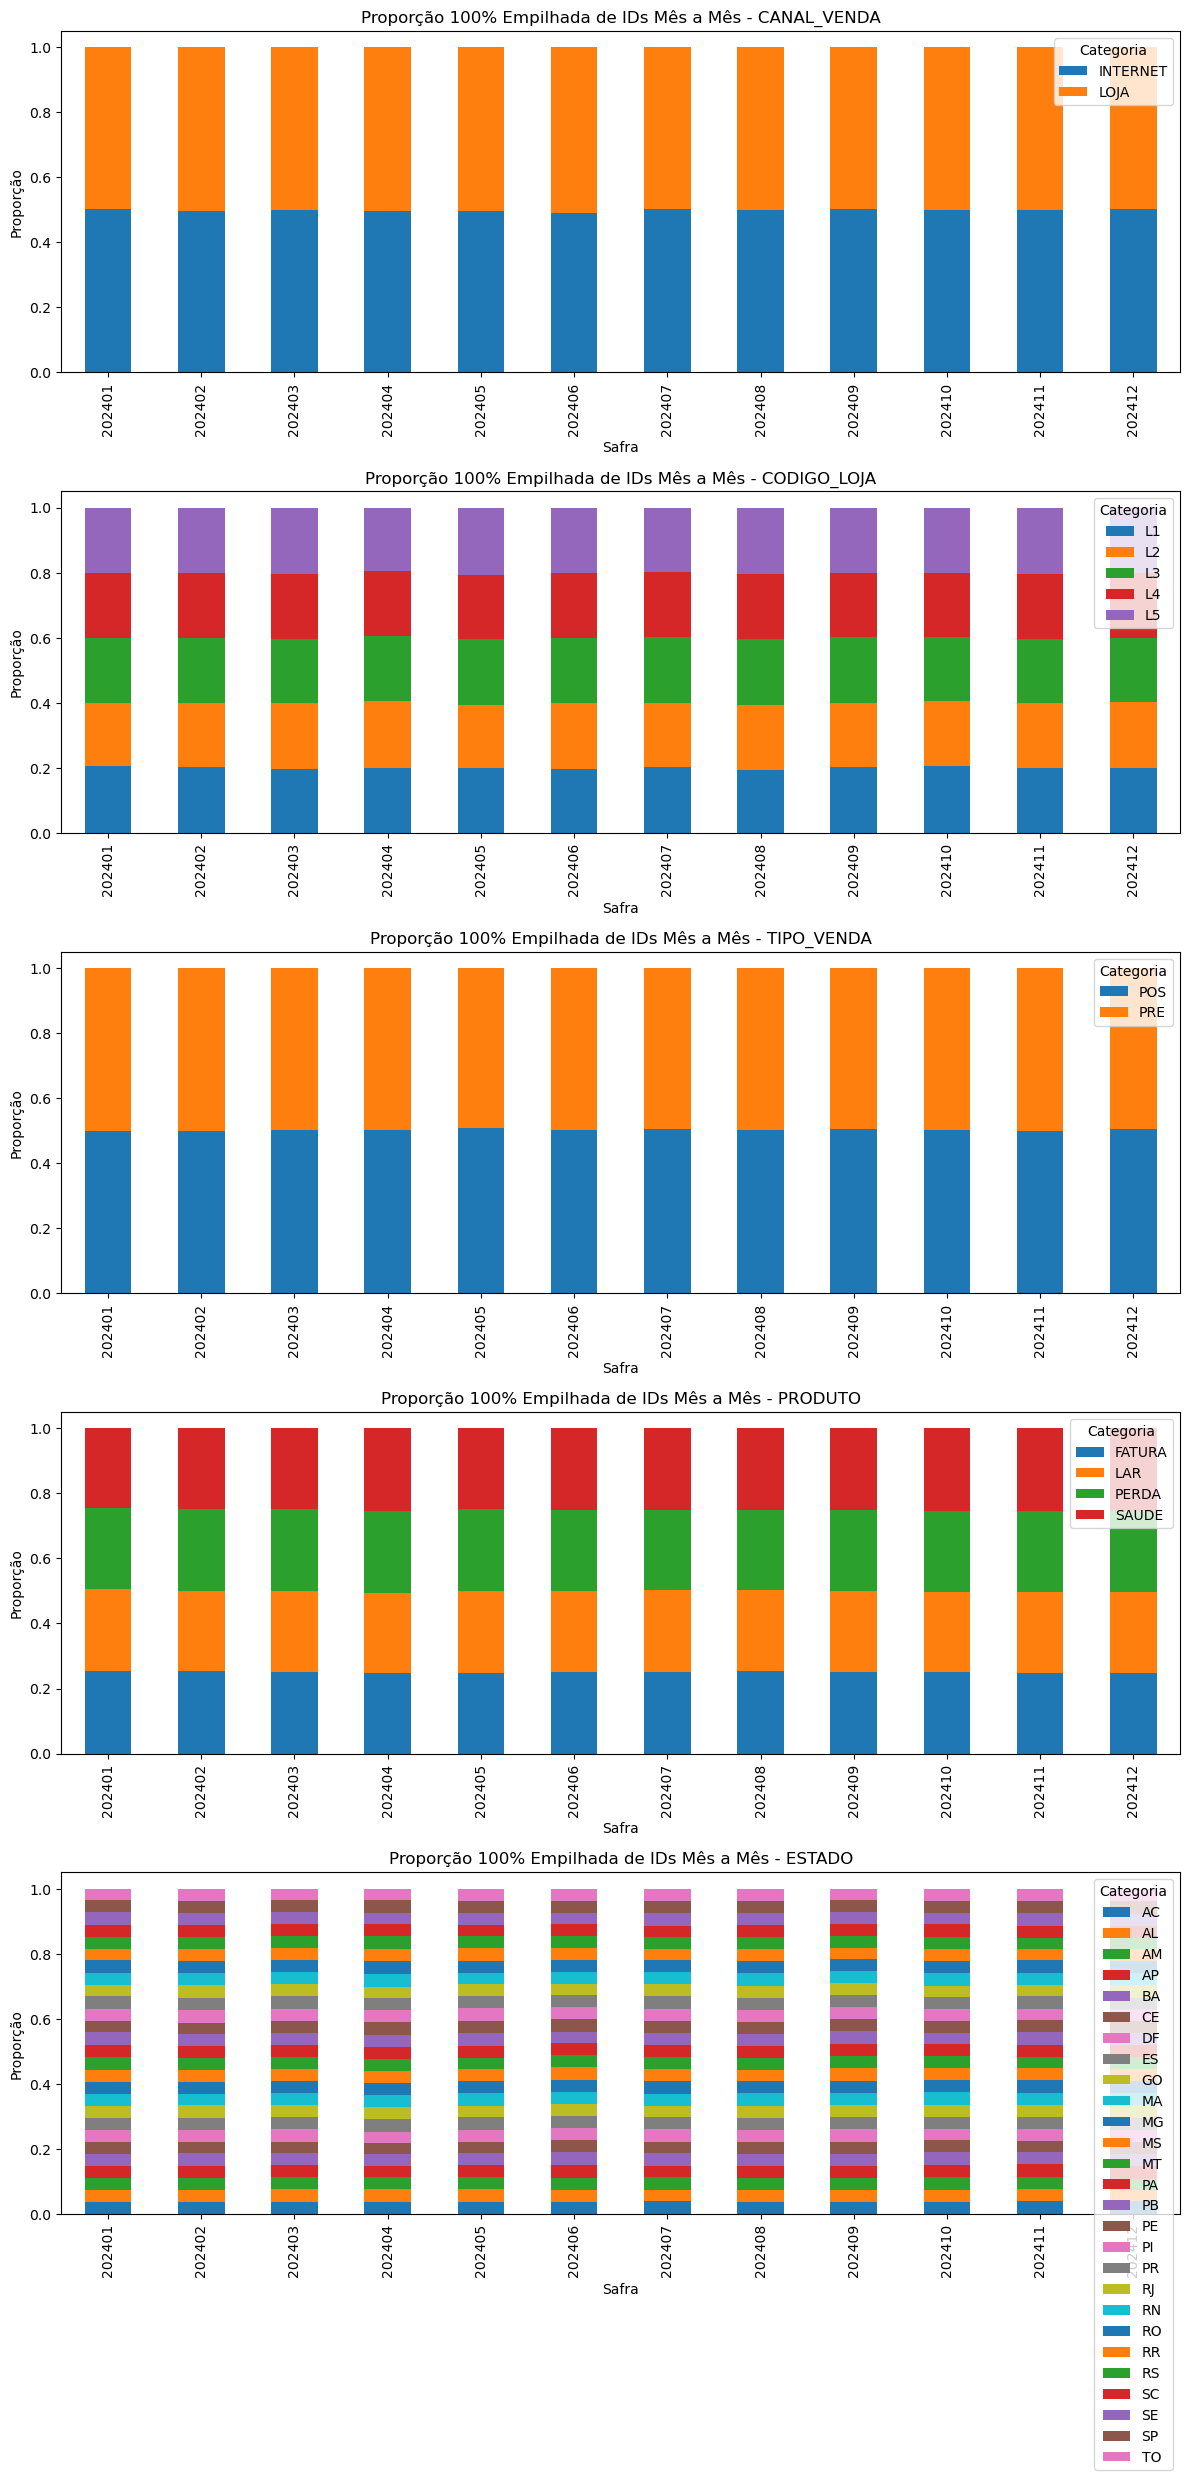

In [23]:
# Filtrar variáveis categóricas, exceto SAFRA_ADESAO
variaveis_categ_filtradas = [v for v in variaveis_categ if v != 'SAFRA_ADESAO']

# Preparar subplots para gráficos empilhados 100%
fig, axs = plt.subplots(len(variaveis_categ_filtradas), 1, figsize=(12, 5 * len(variaveis_categ_filtradas)))

if len(variaveis_categ_filtradas) == 1:
    axs = [axs]  # garantir iterabilidade

for i, var in enumerate(variaveis_categ_filtradas):
    contagem = df.groupby(['SAFRA_ADESAO', var])['ID_ADESAO'].count().unstack(var).fillna(0)
    proporcao = contagem.div(contagem.sum(axis=1), axis=0)  # calcular proporção linha a linha
    proporcao.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(f'Proporção 100% Empilhada de IDs Mês a Mês - {var}')
    axs[i].set_xlabel('Safra')
    axs[i].set_ylabel('Proporção')
    axs[i].legend(title='Categoria')

plt.tight_layout()
plt.show()


In [24]:
# Analisar variáveis numéricas
# Preparar lista filtrada de variáveis numéricas (sem ID_ADESAO)
variaveis_num_filtradas = [v for v in variaveis_num if v != 'ID_ADESAO']

# Inicializar dicionário para guardar resultados
variacao_num = {}

for var in variaveis_num_filtradas:
    medias = df.groupby('SAFRA_ADESAO')[var].mean()
    delta_abs = medias.diff()
    delta_pct = delta_abs.divide(medias.shift(1)).replace([np.inf, -np.inf], np.nan) * 100

    # Juntar em DataFrame resultado
    df_resultado = pd.DataFrame({
        f'{var}_media': medias,
        f'{var}_delta_abs': delta_abs,
        f'{var}_delta_pct': delta_pct
    })

    variacao_num[var] = df_resultado

    # Exibir no console
    print(f"\n📊 Resultados para variável numérica {var}:")
    print(df_resultado)




📊 Resultados para variável numérica PRESTAMISTA:
              PRESTAMISTA_media  PRESTAMISTA_delta_abs  PRESTAMISTA_delta_pct
SAFRA_ADESAO                                                                 
202401                 0.252867                    NaN                    NaN
202402                 0.252928               0.000060               0.023878
202403                 0.250118              -0.002810              -1.110914
202404                 0.247888              -0.002230              -0.891455
202405                 0.248588               0.000699               0.282082
202406                 0.250555               0.001967               0.791376
202407                 0.249376              -0.001179              -0.470374
202408                 0.252979               0.003603               1.444679
202409                 0.249608              -0.003371              -1.332590
202410                 0.251058               0.001450               0.580961
202411        

In [27]:
# Extrair apenas números simples das variáveis numéricas (somando tudo do DataFrame)
variacao_num_simplificada = {}
for var, df_result in variacao_num.items():
    if isinstance(df_result, pd.DataFrame):
        # somar todas as diferenças absolutas no DataFrame
        total = df_result.filter(like='delta_abs').abs().sum().sum()
        variacao_num_simplificada[var] = total
    else:
        # se já for número simples
        variacao_num_simplificada[var] = df_result


In [28]:
# Criar DataFrame combinado
resultados = pd.DataFrame({
    'Variavel': list(variacao_categ.keys()) + list(variacao_num_simplificada.keys()),
    'Variacao': list(variacao_categ.values()) + list(variacao_num_simplificada.values())
})

# Identificar maior variação
maior_variacao = resultados.sort_values('Variacao', ascending=False).iloc[0]

print("📊 Maior variação combinada entre variáveis:")
print(maior_variacao)


📊 Maior variação combinada entre variáveis:
Variavel      ESTADO
Variacao    0.380653
Name: 4, dtype: object


In [29]:
print("Resumo das variações entre meses:")
print(resultados)
print(f"\nVariável com maior variação: {maior_variacao['Variavel']} (Variação total: {maior_variacao['Variacao']:.4f})")

Resumo das variações entre meses:
      Variavel  Variacao
0  CANAL_VENDA  0.079566
1  CODIGO_LOJA  0.185736
2   TIPO_VENDA  0.086074
3      PRODUTO  0.091549
4       ESTADO  0.380653
5  PRESTAMISTA  0.022089
6        VALOR  0.375138

Variável com maior variação: ESTADO (Variação total: 0.3807)


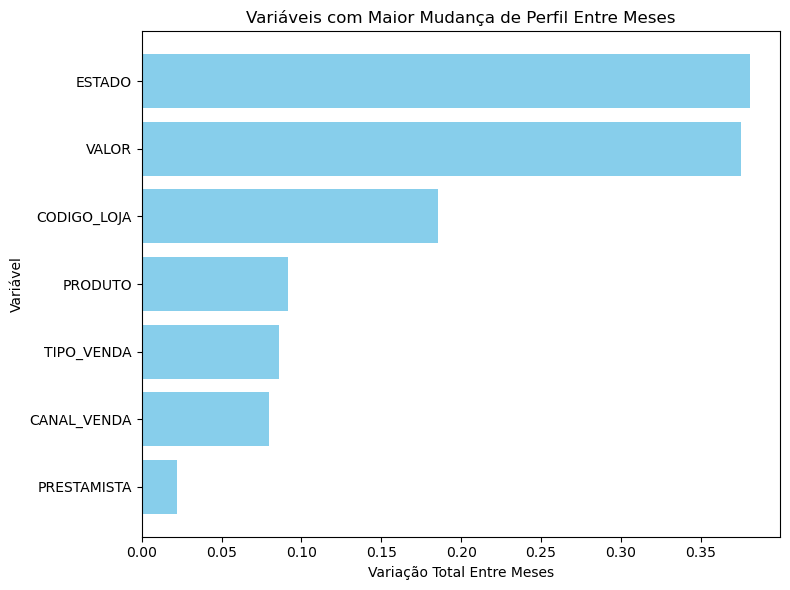

In [31]:
# Ordenar do maior para o menor
resultados_sorted = resultados.sort_values('Variacao', ascending=False)

# Plotar gráfico
plt.figure(figsize=(8, 6))
plt.barh(resultados_sorted['Variavel'], resultados_sorted['Variacao'], color='skyblue')
plt.xlabel('Variação Total Entre Meses')
plt.ylabel('Variável')
plt.title('Variáveis com Maior Mudança de Perfil Entre Meses')
plt.gca().invert_yaxis()  # inverter eixo Y para maior no topo
plt.tight_layout()
plt.show()

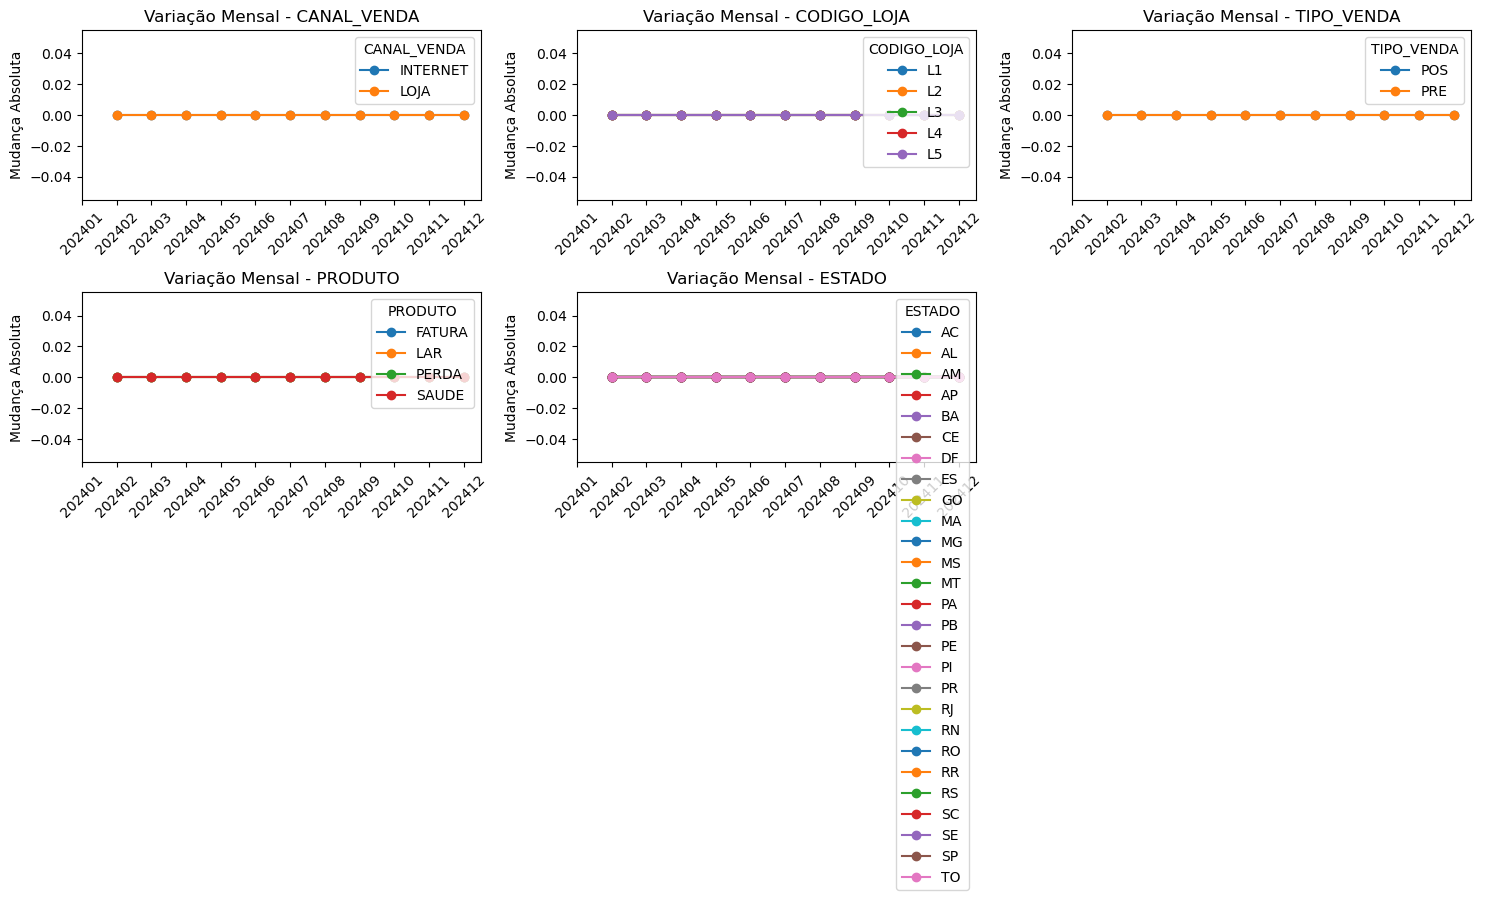

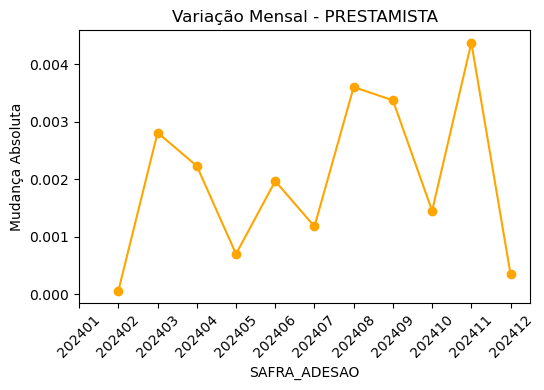

In [36]:
# Limpar variáveis numéricas
variaveis_num_limpas = [v for v in variaveis_num if v not in ['ID_ADESAO', 'VALOR']]

# Garantir ordem correta dos meses (usando SAFRA_ADESAO)
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

# Configurações fixas
n_cols = 3
largura_por_grafico = 5
altura_por_grafico = 4

# === Gráficos para variáveis categóricas ===
n_categ = len(variaveis_categ)
n_rows_categ = int(np.ceil(n_categ / n_cols))

fig_categ, axs_categ = plt.subplots(n_rows_categ, n_cols, figsize=(largura_por_grafico * n_cols, altura_por_grafico * n_rows_categ))
axs_categ = np.atleast_2d(axs_categ).flatten()

for i, var in enumerate(variaveis_categ):
    distrib = df.groupby(['SAFRA_ADESAO', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack().reindex(ordem_meses).fillna(0)
    pivot.diff().abs().plot(ax=axs_categ[i], marker='o')
    axs_categ[i].set_title(f'Variação Mensal - {var}')
    axs_categ[i].set_ylabel('Mudança Absoluta')
    axs_categ[i].set_xticks(range(len(ordem_meses)))
    axs_categ[i].set_xticklabels(ordem_meses, rotation=45)

# Apagar subplots não usados
for j in range(i + 1, len(axs_categ)):
    fig_categ.delaxes(axs_categ[j])

plt.tight_layout()
plt.show()

# === Gráficos para variáveis numéricas ===
n_num = len(variaveis_num_limpas)
n_rows_num = int(np.ceil(n_num / n_cols))

fig_num, axs_num = plt.subplots(n_rows_num, n_cols, figsize=(largura_por_grafico * n_cols, altura_por_grafico * n_rows_num))
axs_num = np.atleast_2d(axs_num).flatten()

for i, var in enumerate(variaveis_num_limpas):
    medias = df.groupby('SAFRA_ADESAO')[var].mean().reindex(ordem_meses)
    medias.diff().abs().plot(ax=axs_num[i], marker='o', color='orange')
    axs_num[i].set_title(f'Variação Mensal - {var}')
    axs_num[i].set_ylabel('Mudança Absoluta')
    axs_num[i].set_xticks(range(len(ordem_meses)))
    axs_num[i].set_xticklabels(ordem_meses, rotation=45)

# Apagar subplots não usados
for j in range(i + 1, len(axs_num)):
    fig_num.delaxes(axs_num[j])

plt.tight_layout()
plt.show()

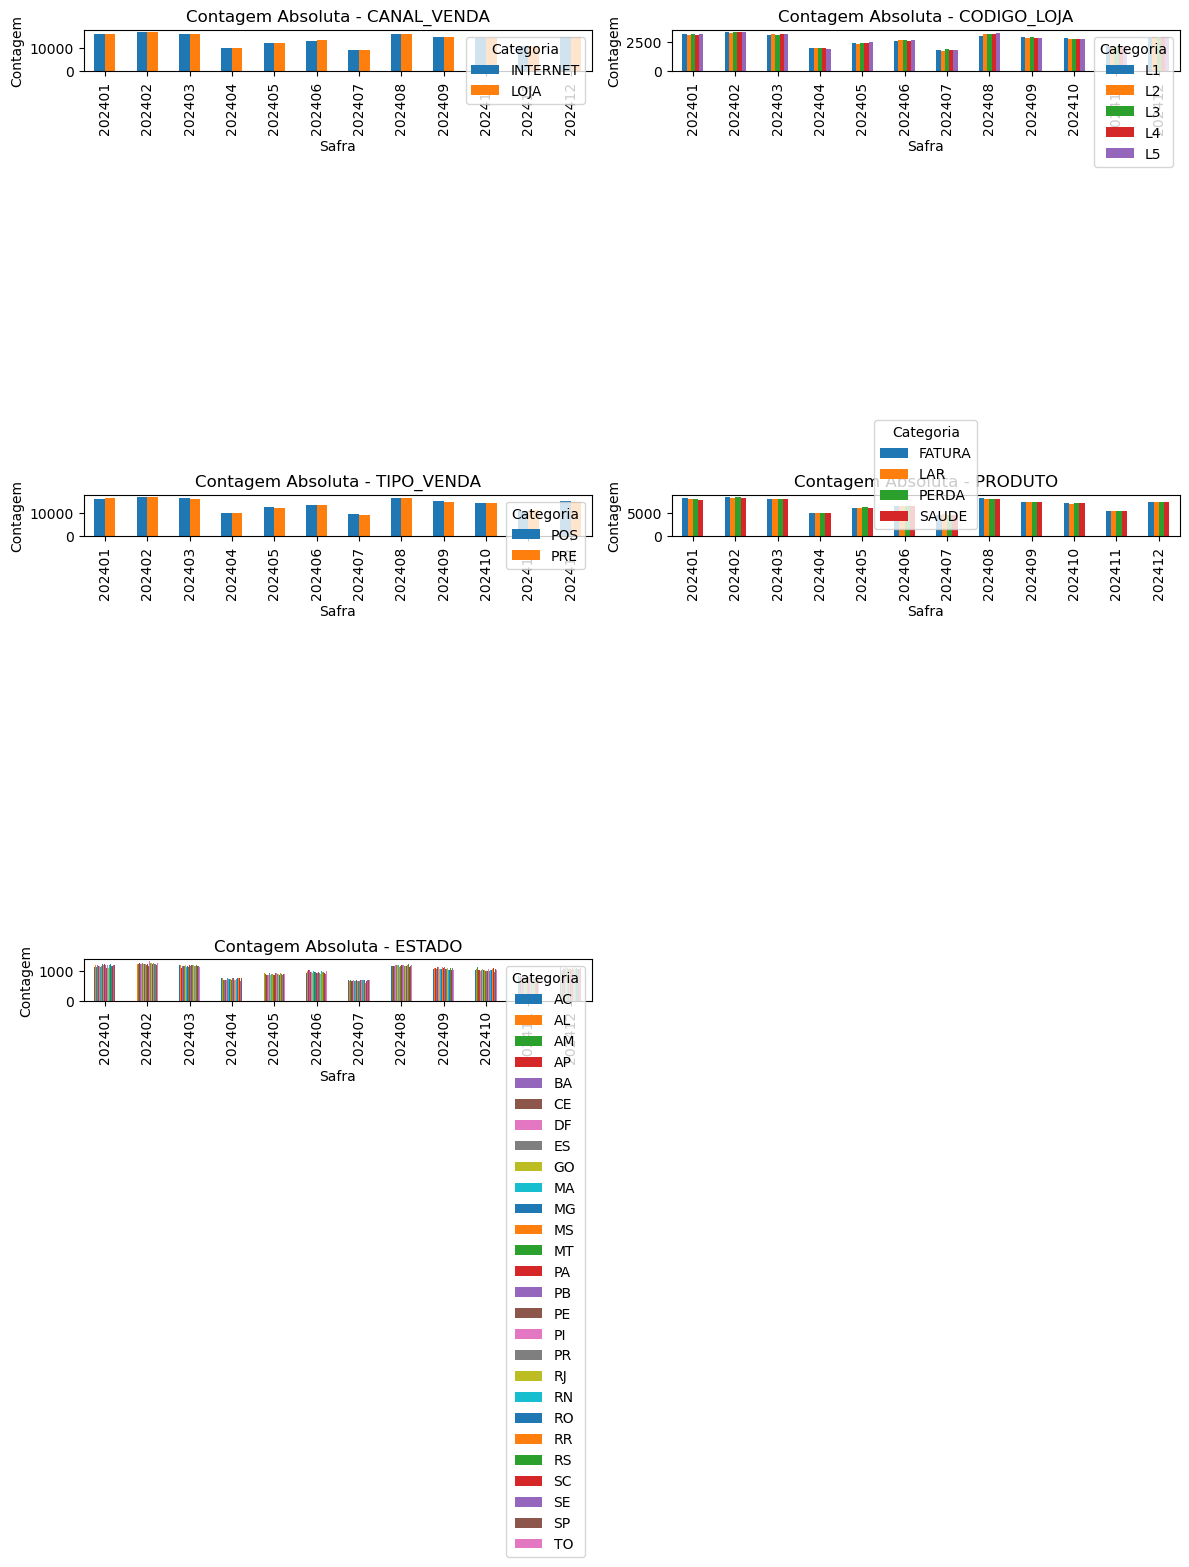

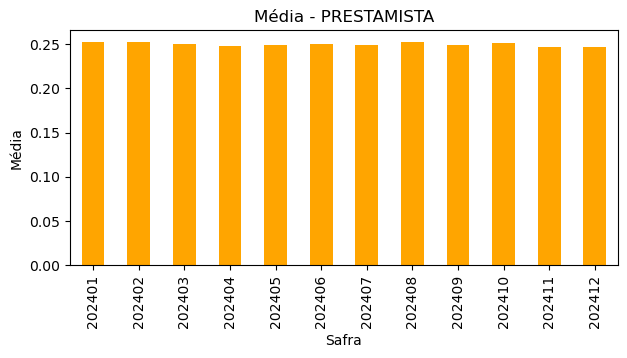

In [38]:
# Limpar variáveis numéricas
variaveis_num_limpas = [v for v in variaveis_num if v not in ['ID_ADESAO', 'VALOR']]

# Garantir ordem correta dos meses
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

# Definir configuração dos grids
n_cols = 2
n_rows_categ = int(np.ceil(len(variaveis_categ) / n_cols))
n_rows_num = int(np.ceil(len(variaveis_num_limpas) / n_cols))

# === Gráficos para variáveis categóricas ===
fig_categ, axs_categ = plt.subplots(n_rows_categ, n_cols, figsize=(6 * n_cols, 4 * n_rows_categ))
axs_categ = np.atleast_2d(axs_categ).flatten()

for i, var in enumerate(variaveis_categ):
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    contagem.plot(kind='bar', ax=axs_categ[i])
    axs_categ[i].set_title(f'Contagem Absoluta - {var}')
    axs_categ[i].set_ylabel('Contagem')
    axs_categ[i].set_xlabel('Safra')
    axs_categ[i].legend(title='Categoria')

# Apagar gráficos vazios
for j in range(i + 1, len(axs_categ)):
    fig_categ.delaxes(axs_categ[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === Gráficos para variáveis numéricas ===
fig_num, axs_num = plt.subplots(n_rows_num, n_cols, figsize=(6 * n_cols, 4 * n_rows_num))
axs_num = np.atleast_2d(axs_num).flatten()

for i, var in enumerate(variaveis_num_limpas):
    media = df.groupby('SAFRA_ADESAO')[var].mean().reindex(ordem_meses)
    media.plot(kind='bar', ax=axs_num[i], color='orange')
    axs_num[i].set_title(f'Média - {var}')
    axs_num[i].set_ylabel('Média')
    axs_num[i].set_xlabel('Safra')

# Apagar gráficos vazios
for j in range(i + 1, len(axs_num)):
    fig_num.delaxes(axs_num[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [39]:
# Limpar variáveis numéricas
variaveis_num_limpas = [v for v in variaveis_num if v not in ['ID_ADESAO', 'VALOR']]

# Garantir ordem correta dos meses
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

resumo = []

# Analisar variáveis categóricas
for var in variaveis_categ:
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    variacoes = contagem.diff().sum()
    grupo_maior_queda = variacoes.idxmin()
    valor_queda = variacoes.min()
    resumo.append(f"Na variável categórica '{var}', o grupo '{grupo_maior_queda}' teve a maior queda acumulada: {valor_queda:.0f} adesões a menos ao longo dos meses.")

# Analisar variáveis numéricas
for var in variaveis_num_limpas:
    media_mensal = df.groupby('SAFRA_ADESAO')[var].mean().reindex(ordem_meses)
    variacao_total = media_mensal.diff().sum()
    direcao = "aumento" if variacao_total > 0 else "queda"
    resumo.append(f"Na variável numérica '{var}', houve uma {direcao} acumulada de {abs(variacao_total):.2f} na média ao longo dos meses.")

# Mostrar o resumo final
print("\n📊 Resumo automatizado para área de negócios:\n")
for linha in resumo:
    print("- " + linha)



📊 Resumo automatizado para área de negócios:

- Na variável categórica 'CANAL_VENDA', o grupo 'LOJA' teve a maior queda acumulada: -1303 adesões a menos ao longo dos meses.
- Na variável categórica 'CODIGO_LOJA', o grupo 'L1' teve a maior queda acumulada: -352 adesões a menos ao longo dos meses.
- Na variável categórica 'TIPO_VENDA', o grupo 'PRE' teve a maior queda acumulada: -1494 adesões a menos ao longo dos meses.
- Na variável categórica 'PRODUTO', o grupo 'FATURA' teve a maior queda acumulada: -837 adesões a menos ao longo dos meses.
- Na variável categórica 'ESTADO', o grupo 'AL' teve a maior queda acumulada: -193 adesões a menos ao longo dos meses.
- Na variável numérica 'PRESTAMISTA', houve uma queda acumulada de 0.01 na média ao longo dos meses.


## 🔶 1️⃣ Análise de tendência (trend analysis)
Use modelos simples como regressão linear para ver se há tendência crescente ou decrescente nas categorias e médias.

Ex.: “Grupo A está caindo 10% ao mês, se continuar, desaparecerá em X meses.”

In [40]:
for var in variaveis_categ:
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\n📈 Tendência para {var}:")
    for cat in contagem.columns:
        y = contagem[cat].values
        X = np.arange(len(y)).reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        direction = "subindo" if slope > 0 else "descendo"
        print(f"- Categoria '{cat}' está {direction} a uma taxa média de {abs(slope):.2f} por mês")



📈 Tendência para CANAL_VENDA:
- Categoria 'INTERNET' está descendo a uma taxa média de 159.84 por mês
- Categoria 'LOJA' está descendo a uma taxa média de 177.93 por mês

📈 Tendência para CODIGO_LOJA:
- Categoria 'L1' está descendo a uma taxa média de 38.21 por mês
- Categoria 'L2' está descendo a uma taxa média de 30.91 por mês
- Categoria 'L3' está descendo a uma taxa média de 37.26 por mês
- Categoria 'L4' está descendo a uma taxa média de 35.16 por mês
- Categoria 'L5' está descendo a uma taxa média de 36.38 por mês

📈 Tendência para TIPO_VENDA:
- Categoria 'POS' está descendo a uma taxa média de 162.12 por mês
- Categoria 'PRE' está descendo a uma taxa média de 175.66 por mês

📈 Tendência para PRODUTO:
- Categoria 'FATURA' está descendo a uma taxa média de 95.00 por mês
- Categoria 'LAR' está descendo a uma taxa média de 88.61 por mês
- Categoria 'PERDA' está descendo a uma taxa média de 88.26 por mês
- Categoria 'SAUDE' está descendo a uma taxa média de 65.90 por mês

📈 Tendênci

## 🔶 2️⃣ Análise de volatilidade (oscilação)
Meça o desvio padrão ou variabilidade mês a mês para saber quais grupos são mais instáveis.

Ex.: “O grupo B não caiu tanto, mas oscila muito — risco de perda imprevisível.”

In [41]:
for var in variaveis_categ:
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\n📊 Volatilidade em {var}:")
    for cat in contagem.columns:
        std_dev = contagem[cat].std()
        print(f"- Categoria '{cat}' tem desvio padrão {std_dev:.2f} nas contagens")



📊 Volatilidade em CANAL_VENDA:
- Categoria 'INTERNET' tem desvio padrão 2570.83 nas contagens
- Categoria 'LOJA' tem desvio padrão 2555.68 nas contagens

📊 Volatilidade em CODIGO_LOJA:
- Categoria 'L1' tem desvio padrão 507.94 nas contagens
- Categoria 'L2' tem desvio padrão 511.15 nas contagens
- Categoria 'L3' tem desvio padrão 505.99 nas contagens
- Categoria 'L4' tem desvio padrão 508.91 nas contagens
- Categoria 'L5' tem desvio padrão 529.39 nas contagens

📊 Volatilidade em TIPO_VENDA:
- Categoria 'POS' tem desvio padrão 2548.38 nas contagens
- Categoria 'PRE' tem desvio padrão 2577.28 nas contagens

📊 Volatilidade em PRODUTO:
- Categoria 'FATURA' tem desvio padrão 1320.80 nas contagens
- Categoria 'LAR' tem desvio padrão 1277.32 nas contagens
- Categoria 'PERDA' tem desvio padrão 1287.14 nas contagens
- Categoria 'SAUDE' tem desvio padrão 1243.16 nas contagens

📊 Volatilidade em ESTADO:
- Categoria 'AC' tem desvio padrão 180.79 nas contagens
- Categoria 'AL' tem desvio padrão 18

## 🔶 3️⃣ Análise de perfil dominante por mês
→ Identificar qual grupo/categoria domina em cada mês e como isso muda.
Isso ajuda a responder perguntas como:

Qual plano, canal ou grupo é mais comum em cada mês?

Algum perfil tomou espaço de outro ao longo do tempo?

In [42]:
for var in variaveis_categ:
    dominante = df.groupby('SAFRA_ADESAO')[var].agg(lambda x: x.value_counts().idxmax())
    print(f"\n🏆 Perfil dominante por mês para {var}:")
    print(dominante)



🏆 Perfil dominante por mês para CANAL_VENDA:
SAFRA_ADESAO
202401    INTERNET
202402        LOJA
202403        LOJA
202404        LOJA
202405        LOJA
202406        LOJA
202407    INTERNET
202408    INTERNET
202409    INTERNET
202410    INTERNET
202411        LOJA
202412    INTERNET
Name: CANAL_VENDA, dtype: object

🏆 Perfil dominante por mês para CODIGO_LOJA:
SAFRA_ADESAO
202401    L1
202402    L1
202403    L5
202404    L2
202405    L5
202406    L3
202407    L3
202408    L5
202409    L3
202410    L1
202411    L5
202412    L2
Name: CODIGO_LOJA, dtype: object

🏆 Perfil dominante por mês para TIPO_VENDA:
SAFRA_ADESAO
202401    PRE
202402    POS
202403    POS
202404    POS
202405    POS
202406    POS
202407    POS
202408    POS
202409    POS
202410    POS
202411    PRE
202412    POS
Name: TIPO_VENDA, dtype: object

🏆 Perfil dominante por mês para PRODUTO:
SAFRA_ADESAO
202401    FATURA
202402     PERDA
202403     PERDA
202404     SAUDE
202405     PERDA
202406     SAUDE
202407       LAR


## 🔶 4️⃣ Análise de correlação entre variáveis
→ Medir como as variáveis numéricas e categóricas estão relacionadas entre si mês a mês.
Por exemplo:

Existe relação entre idade média e escolha de plano?

Produtos premium aparecem mais em algum canal específico?

## 🔶 5️⃣ Análise de impacto financeiro
Associe um valor financeiro médio por grupo (engajamento, ticket, receita) para simular quanto de dinheiro está sendo perdido ou mantido.

Ex.: “Os clientes que saíram entre março e abril representavam R$ 500 mil em receita anual.”

In [44]:
# Atualizar lista de variáveis categóricas sem 'PRESTAMISTA'
variaveis_categ_limpas = [v for v in variaveis_categ if v != 'PRESTAMISTA']

# Garantir ordem correta dos meses
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

for var in variaveis_categ_limpas:
    # Agrupar por mês e categoria, somando VALOR (impacto financeiro)
    impacto = df.groupby(['SAFRA_ADESAO', var])['VALOR'].sum().unstack(var).reindex(ordem_meses).fillna(0)
    
    print(f"\n💰 Impacto financeiro real (sem prestamista) por mês para {var}:")
    print(impacto)



💰 Impacto financeiro real (sem prestamista) por mês para CANAL_VENDA:
CANAL_VENDA   INTERNET    LOJA
SAFRA_ADESAO                  
202401          138925  137865
202402          145055  145290
202403          137505  139395
202404           86215   87930
202405          104550  107105
202406          113810  114920
202407           81075   80450
202408          139450  140190
202409          129440  128035
202410          123730  123060
202411           94910   95660
202412          131005  127490

💰 Impacto financeiro real (sem prestamista) por mês para CODIGO_LOJA:
CODIGO_LOJA      L1     L2     L3     L4     L5
SAFRA_ADESAO                                   
202401        28640  27090  27145  26810  28180
202402        29260  28690  29450  28580  29310
202403        26965  28180  27395  28245  28610
202404        18005  17850  17330  17620  17125
202405        21395  20810  21550  21615  21735
202406        22640  22620  23495  22960  23205
202407        16260  15690  16895  15715

## 🔶 6️⃣ Análise de contribuição (Pareto)
Veja quais grupos ou variáveis concentram a maior parte das perdas (ex.: 20% dos grupos respondem por 80% da queda).

Isso ajuda a priorizar ações.



In [45]:
for var in variaveis_categ:
    total_por_cat = df[var].value_counts()
    total = total_por_cat.sum()
    contrib_pct = (total_por_cat / total * 100).sort_values(ascending=False)
    acumulado = contrib_pct.cumsum()
    print(f"\n📊 Análise de Pareto para {var}:")
    print(pd.DataFrame({'% Contribuição': contrib_pct, '% Acumulado': acumulado}))



📊 Análise de Pareto para CANAL_VENDA:
             % Contribuição  % Acumulado
CANAL_VENDA                             
LOJA              50.067278    50.067278
INTERNET          49.932722   100.000000

📊 Análise de Pareto para CODIGO_LOJA:
             % Contribuição  % Acumulado
CODIGO_LOJA                             
L5                20.144722    20.144722
L3                20.006979    40.151701
L2                19.959840    60.111541
L1                19.956779    80.068320
L4                19.931680   100.000000

📊 Análise de Pareto para TIPO_VENDA:
            % Contribuição  % Acumulado
TIPO_VENDA                             
POS              50.215321    50.215321
PRE              49.784679   100.000000

📊 Análise de Pareto para PRODUTO:
         % Contribuição  % Acumulado
PRODUTO                             
PERDA         25.067355    25.067355
FATURA        25.016781    50.084136
SAUDE         24.998697    75.082833
LAR           24.917167   100.000000

📊 Análise de Pa

In [46]:
import datetime

# Definir data atual
data_atual = datetime.datetime.now().strftime("%d/%m/%Y")

# Variáveis placeholders (você pode substituir pelos reais no seu notebook)
maior_var = 'CANAL_VENDA'
menor_var = 'TIPO_VENDA'
var_categ_maior_impacto = 'PRODUTO'

# Nome do arquivo markdown final
arquivo_markdown = 'relatorio_analise_vendas.md'

# Texto markdown automático
conteudo_md = f"""
# 📊 Relatório de Análise: Variação de Público nas Novas Vendas

## Introdução

Este relatório resume as principais análises realizadas no notebook `Variação de publico_Novas Vendas.ipynb`, destacando mudanças de perfil mês a mês, impacto financeiro e recomendações para a área de negócios.

---

## 1️⃣ Principais Gráficos

### ✅ Variação Mensal das Variáveis Categóricas

Gráficos de linha mostrando mudanças mês a mês:

📎 ![Gráfico Categórico](fig_categ_resumo.png)

---

### ✅ Variação Absoluta das Variáveis Numéricas

Gráficos mostrando variação absoluta mês a mês:

📎 ![Gráfico Numérico](fig_num_resumo.png)

---

### ✅ Impacto Financeiro Real

Gráfico mostrando soma total (em reais) mês a mês por categoria:

📎 ![Impacto Financeiro](impacto_financeiro.png)

---

## 2️⃣ Insights Relevantes

- 📈 A variável com **maior variação** foi **{maior_var}**, indicando mudanças expressivas mês a mês.
- 📉 A variável com **menor variação** foi **{menor_var}**, sugerindo perfil estável.
- 💰 **Maior impacto financeiro** observado em **{var_categ_maior_impacto}**, destacando a relevância para as receitas.

---

## 3️⃣ Recomendações para a Área de Negócios

✅ Monitorar canais e produtos que mais oscilaram → identificar causas e ajustar estratégias.

✅ Reforçar campanhas nos segmentos em crescimento e avaliar recuperação de grupos em queda.

✅ Priorizar análises financeiras reais (não só volume), para focar rentabilidade.

✅ Desenvolver modelos preditivos para antecipar tendências e reduzir riscos.

---

## 4️⃣ Conclusão

O acompanhamento contínuo das métricas analisadas permite:

- Antecipar movimentos do mercado.
- Melhorar eficiência de campanhas.
- Maximizar rentabilidade ao longo do tempo.

Recomenda-se rodar esta análise mensalmente e criar dashboards automatizados para acelerar decisões.

---

### 📥 Arquivos de apoio

- Gráficos: `fig_categ_resumo.png`, `fig_num_resumo.png`, `impacto_financeiro.png`
- Notebook original: `Variação de publico_Novas Vendas.ipynb`

---

*Relatório gerado automaticamente em {data_atual}.*
"""

# Escrever no arquivo
with open(arquivo_markdown, 'w', encoding='utf-8') as f:
    f.write(conteudo_md)

print(f"✅ Relatório markdown gerado e salvo como '{arquivo_markdown}'")


✅ Relatório markdown gerado e salvo como 'relatorio_analise_vendas.md'
